## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [32]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [33]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

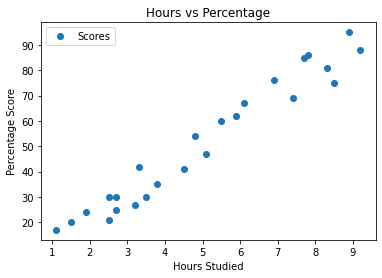

In [35]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [36]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [38]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [39]:
regressor.coef_

array([9.91065648])

In [40]:
regressor.intercept_

2.018160041434662

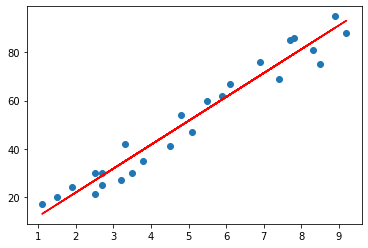

In [41]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line ,color='red');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [42]:
print(X_test) # Testing data  In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [45]:
    # TRAINING SCROE
r2_train=regressor.score(X_train, y_train)
  
    # TESTING SCORE
r2_test= regressor.score(X_test, y_test)
    
num_coeff_bigger = np.sum(abs(regressor.coef_) > 1.0)
    
print('\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(num_coeff_bigger, r2_train, r2_test))


num abs(coeff) > 1.0: 1, r-squared training: 0.95, r-squared test: 0.95



In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


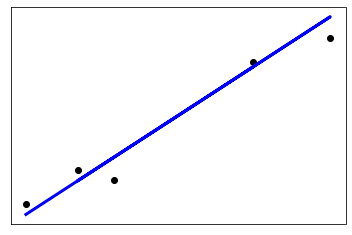

In [47]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Lasso regression
Lasso regression is a form of regularized linear regression that uses an **L1 regularization** penalty for training 

L1 penalty: Minimize the sum of the absolute values of the coefficients
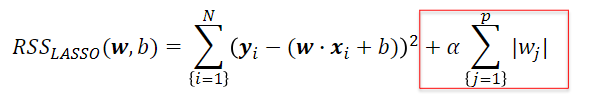

- The parameter alpha controls amount of L1 regularization (default = 1.0).
- The prediction formula is the same as ordinary least-squares.

In [123]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
all_alphas = [1.0,5, 10, 15, 20,25, 30]
all_r2_train = []
all_r2_test = []
for alpha in all_alphas:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 1.00
Features kept: 1, r-squared training: 0.95, r-squared test: 0.95

Alpha = 5.00
Features kept: 1, r-squared training: 0.95, r-squared test: 0.95

Alpha = 10.00
Features kept: 1, r-squared training: 0.93, r-squared test: 0.94

Alpha = 15.00
Features kept: 1, r-squared training: 0.89, r-squared test: 0.90

Alpha = 20.00
Features kept: 1, r-squared training: 0.85, r-squared test: 0.85

Alpha = 25.00
Features kept: 1, r-squared training: 0.79, r-squared test: 0.77

Alpha = 30.00
Features kept: 1, r-squared training: 0.72, r-squared test: 0.67



In [147]:
linlasso = Lasso(alpha=5.0, max_iter = 10000).fit(X_train, y_train)
r2_train = linlasso.score(X_train, y_train)
r2_test = linlasso.score(X_test, y_test)

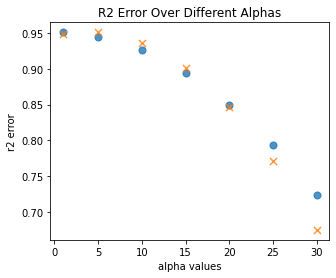

In [148]:
plt.figure(figsize=(5,4))
alphas = all_alphas
plt.scatter(alphas, all_r2_train, marker= 'o', s=50, alpha=0.8)
plt.scatter(alphas, all_r2_test, marker= 'x', s=50, alpha=0.8)
plt.title('R2 Error Over Different Alphas')
plt.xlabel('alpha values')
plt.ylabel('r2 error')
plt.show()

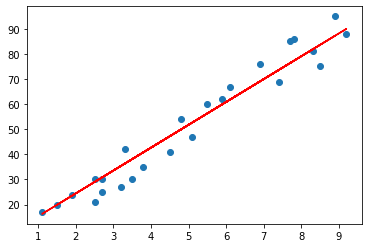

In [149]:
# Plotting the regression line
line = linlasso.coef_*X+linlasso.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line ,color='red');
plt.show()

In [150]:
y_pred =  linlasso.predict(X_test) # Predicting the scores

In [151]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,19.910818
1,27,35.383174
2,69,73.608993
3,30,29.012204
4,62,59.956914


In [152]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.2224459406966233


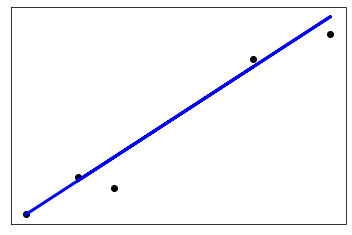

In [153]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [154]:
# You can also test with your own data
hours = [[9.25]]
own_pred = linlasso.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 90.4465557425871
